In [126]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [127]:
# Liste der Variablen ausgeben
%whos   

No variables match your requested type.


In [128]:
%matplotlib notebook

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np               
import   scipy 
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   sklearn 
import   skimage
from     skimage import data
import   time
from     scipy import signal

In [129]:
# Bild laden mit PIL
#img = Image.open("../shaft.bmp")
img = Image.open("coins.bmp")
#img = Image.open("../circle.bmp")
#img = Image.open("../boat512.bmp")
#img = Image.open("../tasse1.bmp")

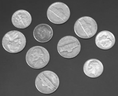

In [130]:
# Beispiel:  Verkleinerung von Bildern
size = (int(img.width/5), int(img.height/5)) # Bildgröße bestimmen und in einem Tupel zusammenfassen
imgsmall = img.resize(size, resample=1)      # Nearest-Neighbour (0), Bilinear (1), Bicubic (2), Lanczos (3)
imgsmall

In [131]:
img2 = np.array(img)

In [132]:
img_width = img.size[1]
img_height = img.size[0]

In [134]:
def MyOtsu(src):
    # Zielbilder anlegen
    dst = np.copy(src)
    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]
    hist = np.histogram(dst) #,, np.array(range(0, 256))?
    häufigkeiten = hist[0]
    werte = hist[1]
    g_max = häufigkeiten.size
    print(häufigkeiten)
    print(werte)
    #print(g_max)
    smallest_sigma = 100000000
    t_opt = -1
    #Anzahl Pixel
    N = 0
    for count in range(0,g_max):
        N += häufigkeiten[count]
        
    #FIND T_OPTIMAL:
    for t in range(0,g_max):
        
        #init
        sig_quadrat_h = 0.0
        w_h = 0.0
        sig_quadrat_v = 0.0
        w_v = 0.0
        
        #anzahl hintergrundpixel
        n_hintergrund = 0
        for g in range(0,t-1):
            n_hintergrund += häufigkeiten[g]
        if(n_hintergrund > 0): # damit kein divide durch 0 auftritt          
            w_h = n_hintergrund/N
            #Mü_h
            u_h = 1/n_hintergrund
            temp_h = 0
            for g in range(0,t-1):
                temp_h += g*häufigkeiten[g]
            u_h = u_h*temp_h
            #sigma h
            sig_quadrat_h = 1/n_hintergrund
            sigtemp_h = 0
            for g in range(0,t-1):
                sigtemp_h += (g-u_h)*(g-u_h) * häufigkeiten[g]
            sig_quadrat_h = sig_quadrat_h*sigtemp_h

        #anzahl vordergrundpixel:
        n_vordergrund = 0
        for g in range(t,g_max):
            n_vordergrund += häufigkeiten[g]
        if(n_vordergrund > 0): # damit kein divide durch 0 auftritt
            w_v = n_vordergrund/N
            #mü_v
            u_v = 1/n_vordergrund
            temp_v = 0
            for g in range(t,g_max):
                temp_v += g*häufigkeiten[g]
            u_v = u_v*temp_v
            #sigma v
            sig_quadrat_v = 1/n_vordergrund
            sigtemp_v = 0
            for g in range(t,g_max):
                sigtemp_v += (g-u_v)*(g-u_v) * häufigkeiten[g]
            sig_quadrat_v = sig_quadrat_v*sigtemp_v
        
        ##------------------------
        #sigma
        sigma_quadrat = ((w_h*sig_quadrat_h) + (w_v*sig_quadrat_v))
       # print("sigma:",sigma_quadrat)
        #suche nach kleinstem sigma_quadrat
        if(smallest_sigma>sigma_quadrat):
            t_opt = t
            smallest_sigma=sigma_quadrat
           
    #finished searching for threshhold_optimal
    grauwert_schwarz = werte[t_opt]
   # print("Grauwert_schwarzThreshhold:",grauwert_schwarz)
   # print("topt:",t_opt)
    #bildbearbeiten:
    for y in range(0,ysize):
        for x in range(0,xsize):
           # print(dst[y][x])
            if(dst[y][x] < grauwert_schwarz):
                dst[y][x] = 0
            if(dst[y][x] >= grauwert_schwarz):
                dst[y][x] = 250 
    return dst

[  3625 162042  25849   4645   5540  14489  38584  20981   8072   2701]
[ 31.   53.4  75.8  98.2 120.6 143.  165.4 187.8 210.2 232.6 255. ]
Runtime   = 1.227s


<IPython.core.display.Javascript object>


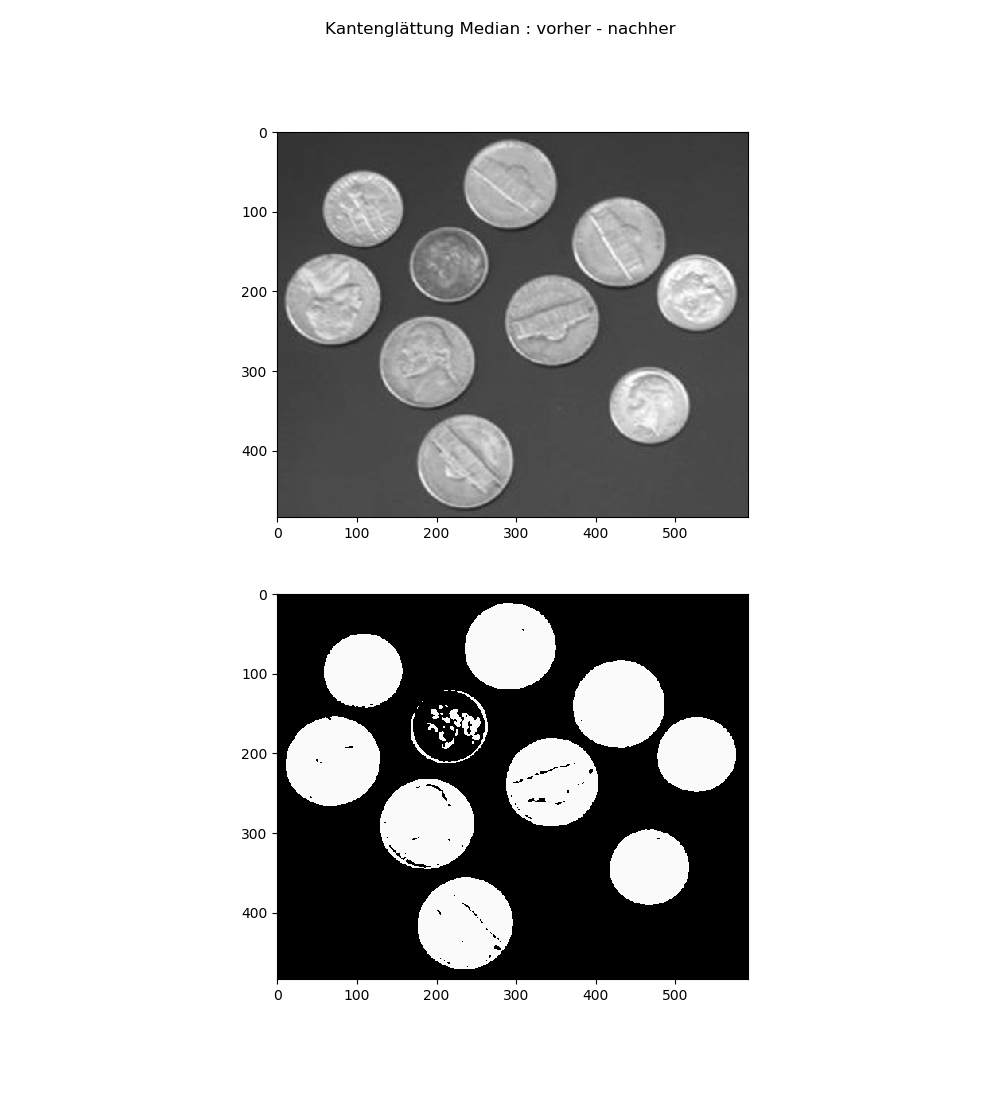

min/max = 0 250
shape   = (484, 592)
dtype   = int32


In [135]:
start = time.time()

# in höheren Datentyp umwandeln  (uint8 --> int), damit Ergebnisse nicht beschnitten werden !
srcpic  = np.copy(img2)      # eine echte Kopie anlegen
srcpic  = srcpic.astype(int) # und in den Datentyp int umwandeln
pic = MyOtsu(srcpic)

ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))



plt.figure(figsize = (10,11))

plt.subplot(211)
plt.imshow(srcpic, cmap='gray', vmin=0, vmax=255)
plt.subplot(212)
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)
plt.suptitle('Kantenglättung Median : vorher - nachher')
plt.show()

# Informationen zum Bild
print('min/max =', pic.min(), pic.max())
print('shape   =', pic.shape)
print('dtype   =', pic.dtype)